##**Obtenção das bases de imagens:**
*Baixar as imagens de teste diretamente do github*

*Obs.: Desta forma as imagens ficarão disponíveis somente enquanto esta sessão permanecer ativa ou até que o usuário  clique em no menu: Runtime>Factory reset runtime*

In [ ]:
!git clone https://github.com/guimota-uerj/TestImages.git
!pwd
!ls

fatal: destination path 'TestImages' already exists and is not an empty directory.
/content
sample_data  TestImages


In [ ]:
%cd /content/TestImages/PorDoSol/

/content/TestImages/PorDoSol


# **Questão 1:**

Utilizando a imagem colorida TestImages/PorDoSol/PorDoSol.tiff baixada do github, implemente  e demosnstre as diferenças (em termos de tamanho do arquivo em bytes e do erro quadrático médio)  entre a imagem original e versões a serem salvas nos formatos de arquivo a seguir:

* jpeg com fator de qualidade de 25%
* jpeg com fator de qualidade de 50%
* jpeg com fator de qualidade de 75%
* jpeg com fator de qualidade de 100%
* TIFF - Com compressãão LZW (por padrão o openCV salva o formato tiff com este tipo de compressão)


#**JPEG**
Esta primeira parte é responsável por compactar, salvar em jpeg e extrair os dados pedidos na questão 1 com a imagem compactada em 25%, 50%, 75% e 100% na formatação ".jpeg":

total 27340
drwxr-xr-x  2 root root     4096 Sep  9 16:25 .
drwxr-xr-x 10 root root     4096 Sep  9 16:25 ..
-rw-r--r--  1 root root  4652528 Sep  9 19:11 compress_100.jpg
-rw-r--r--  1 root root   287679 Sep  9 19:11 compress_25.jpg
-rw-r--r--  1 root root   382902 Sep  9 19:11 compress_50.jpg
-rw-r--r--  1 root root   596175 Sep  9 19:11 compress_75.jpg
-rw-r--r--  1 root root  9957186 Sep  9 16:25 compress.tiff
-rw-r--r--  1 root root 11167608 Sep  9 16:25 PorDoSol.tiff
-rw-r--r--  1 root root   931653 Sep  9 16:25 RecortePorDoSol.tiff


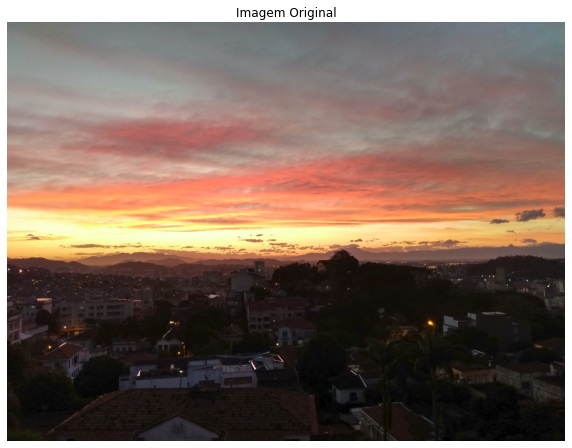

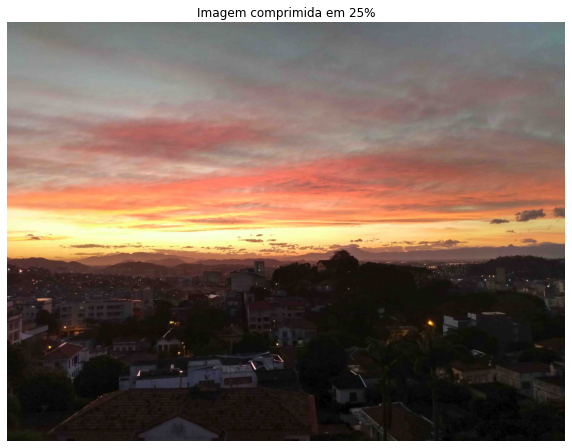

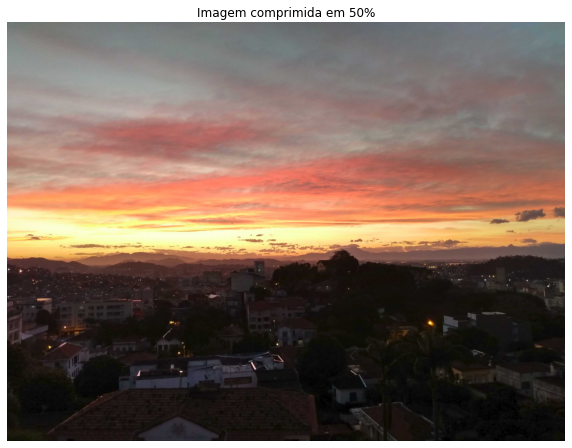

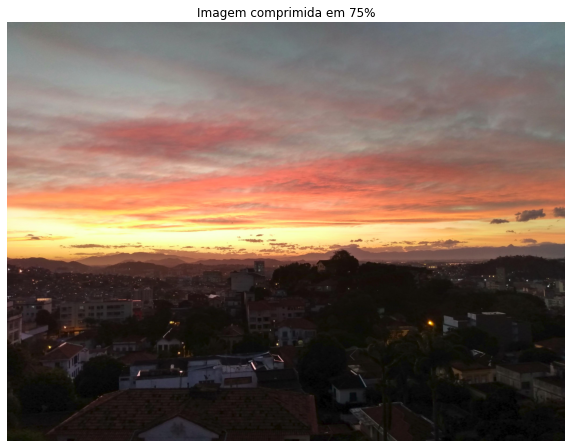

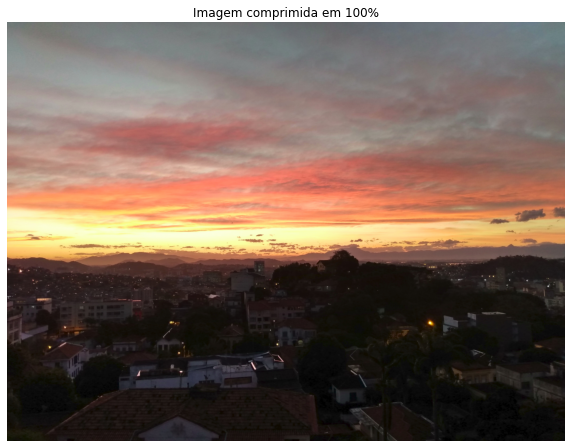

In [ ]:
import cv2
import matplotlib.pyplot as plt

#TRABALHANDO COM A IMAGEM ORIGINAL
img = cv2.imread('PorDoSol.tiff')
plt.figure(figsize = (10,10))
plt.title('Imagem Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

#TRABALHANDO COM 25% DA IMAGEM
cv2.imwrite("compress_25.jpg", img, [cv2.IMWRITE_JPEG_QUALITY, 25])
#salva a imagem em .jpeg com 25% da qualidade da imagem original
img25 = cv2.imread('compress_25.jpg')
plt.figure( figsize = (10,10))
plt.title('Imagem comprimida em 25%')
plt.axis('off')
plt.imshow(cv2.cvtColor(img25, cv2.COLOR_BGR2RGB))


#TRABALHANDO COM 50% DA IMAGEM
cv2.imwrite("compress_50.jpg", img, [cv2.IMWRITE_JPEG_QUALITY, 50])
#salva a imagem em .jpeg com 50% da qualidade da imagem original
img50 = cv2.imread('compress_50.jpg')
plt.figure( figsize = (10,10))
plt.title('Imagem comprimida em 50%')
plt.axis('off')
plt.imshow(cv2.cvtColor(img50, cv2.COLOR_BGR2RGB))

#TRABALHANDO COM 75% DA IMAGEM
cv2.imwrite("compress_75.jpg", img, [cv2.IMWRITE_JPEG_QUALITY, 75])
#salva a imagem em .jpeg com 75% da qualidade da imagem original
img75 = cv2.imread('compress_75.jpg')
plt.figure( figsize = (10,10))
plt.title('Imagem comprimida em 75%')
plt.axis('off')
plt.imshow(cv2.cvtColor(img75, cv2.COLOR_BGR2RGB))

#TRABALHANDO COM 100% DA IMAGEM
cv2.imwrite("compress_100.jpg", img, [cv2.IMWRITE_JPEG_QUALITY, 100])
#salva a imagem em .jpeg com 100% da qualidade da imagem original
img100 = cv2.imread('compress_100.jpg')
plt.figure( figsize = (10,10))
plt.title('Imagem comprimida em 100%')
plt.axis('off')
plt.imshow(cv2.cvtColor(img100, cv2.COLOR_BGR2RGB))

!ls -la

#**Compressão LZW**
Esta segunda parte é responsável por compactar, salvar em tiff e extrair os dados pedidos na questão 1 com a imagem compactada em LZW na formatação ".tiff":

total 27340
drwxr-xr-x  2 root root     4096 Sep  9 16:25 .
drwxr-xr-x 10 root root     4096 Sep  9 16:25 ..
-rw-r--r--  1 root root  4652528 Sep  9 19:11 compress_100.jpg
-rw-r--r--  1 root root   287679 Sep  9 19:11 compress_25.jpg
-rw-r--r--  1 root root   382902 Sep  9 19:11 compress_50.jpg
-rw-r--r--  1 root root   596175 Sep  9 19:11 compress_75.jpg
-rw-r--r--  1 root root  9957186 Sep  9 19:11 compress.tiff
-rw-r--r--  1 root root 11167608 Sep  9 16:25 PorDoSol.tiff
-rw-r--r--  1 root root   931653 Sep  9 16:25 RecortePorDoSol.tiff


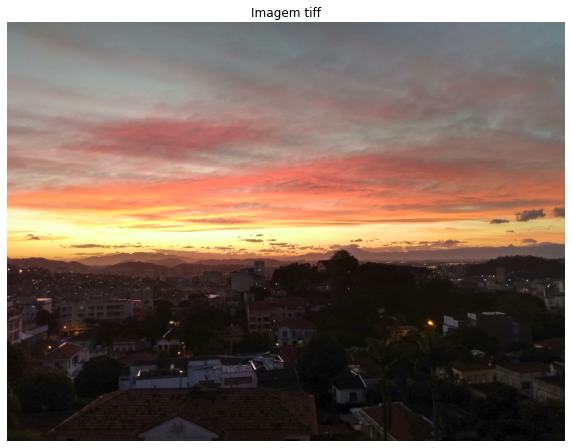

In [ ]:
import cv2
import matplotlib.pyplot as plt

#TRABALHANDO COM A IMAGEM ORIGINAL
img = cv2.imread('PorDoSol.tiff')

#TESTANDO COMPRESSÃO LZW
cv2.imwrite("compress.tiff", img)
img2 = cv2.imread('compress.tiff')
plt.figure(figsize = (10,10))
plt.title('Imagem tiff')
plt.axis('off')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

!ls -la

#**Calculo**


In [ ]:
import numpy as np

#fonte: https://www.pyimagesearch.com/2014/09/15/python-compare-two-images/
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.size)

	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err


img_0 = cv2.imread('PorDoSol.tiff')
print ('A imagem original não deve ter EQM')

img_1 = cv2.imread('compress.tiff')
print ('Desvio padrão = ',np . std ( img_1 ))
mqe = mse(img_0,img_1)
print ('EQM da imagem tiff_LZW = ', mqe)

img_100 = cv2.imread('compress_100.jpg')
print ('Desvio padrão = ',np . std ( img_100 ))
mqe = mse(img_0,img_100)
print ('EQM da imagem 100% = ', mqe)

img_75 = cv2.imread('compress_75.jpg')
print ('Desvio padrão = ',np . std ( img_75 ))
mqe = mse(img_0,img_75)
print ('EQM da imagem 75% = ', mqe)

img_50 = cv2.imread('compress_50.jpg')
print ('Desvio padrão = ',np . std ( img_50 ))
mqe = mse(img_0,img_50)
print ('EQM da imagem 50% = ', mqe)

img_25 = cv2.imread('compress_25.jpg')
print ('Desvio padrão = ',np . std ( img_25 ))
mqe = mse(img_0,img_25)
print ('EQM da imagem 25% = ', mqe)


A imagem original não deve ter EQM
Desvio padrão =  69.37704766989636
EQM da imagem tiff_LZW =  0.0
Desvio padrão =  69.35538887593025
EQM da imagem 100% =  0.5469088233481262
Desvio padrão =  69.3322252644626
EQM da imagem 75% =  2.5930900980029588
Desvio padrão =  69.30953232732189
EQM da imagem 50% =  4.12215863330046
Desvio padrão =  69.3247376859995
EQM da imagem 25% =  8.630669404380342


# **Resultados e discussões**
Toda imagem digital é codificada e armazenada em uma simbologia, quando aberta ela é descodificada. Ao armazenar imagen na memória do computador muitos formatos de imagen sofrem compressão. Compressão por sua vez remove espaços, ou em caso de imagens, pixels, de maneira organizada e metódica. A compressão pode ser realizada de duas formas: *com perdas* ou *sem perdas*. O formato JPEG, é o formato mais usado para fotografias, que permite uma grande compressão de dados, esta por sua vez é do tipo 'de perdas', o que faz com que cada vez com que o arquivo é comprimido aconteca mais perdas da imagem. Ele permite ser salvo com 0% a 100% da qualidade de imagem (afetada pela compressão), assim quando visualizado um arquivo de qualidades diferentes, sua resolução será melhor com qualidade 100%. Em contrapartida o formato tiff utiliza a compressão LZW, um algoritmo de compressão sem perdas. Isso significa que quando a figura que usa dessa compressão é decodificada, ela volta ao tamanho original, ou próximo a ele como é o caso do LZW.

Abaixo é apresentado os valores obtidos do tamnhos em bytes das imagens a partir da compressão de de formatos em JPEG, TIFF e seu tamanho original em TIFF.

Imagem    |Tamanho | DesvioPadrão      | EQM
--------- | ------ | -------           | ---------
Jpeg 25%  |287679  |69.3247376859995   |8.630669404380342
Jpeg 50%  |382902  |69.30953232732189  |4.12215863330046
Jpeg 75%  |596175  |69.3322252644626   |2.5930900980029588
Jpeg 100% |4652528 |69.35538887593025  |0.5469088233481262
Tiff c/ LZW |9957186|69.37704766989636 |0.0
Original  |11167608| 69.37704766989636 |...

Analisando a tabela percebe-se que quanto menor a qualidade da imagem, maior será o fator de compressão nas imagens JPEG, o que resulta em valores menores do tamanho dessa imagem. Deve-se notar também que a imgem com qualidade de 100% tem tamanho menor que a metade do tamanho da original e, que a imagem com compressão LZW tem um valor próximo ao do original.

Já o valor de desvio padrão de uma imagem indica a variabilidade de distância entre valores do pixel e a média deles. Visualmente isso implica no contraste. Como pode ser observado na tabela os valores são muito próximos, o que indica que o contraste nas imagens comprimidas tem um valor equivalente ao contraste da imagem original.

Analisando as imagens por si só é dificil a olho nu reparar grandes mudanças, porém fica possivel de detectaf certa perda de dados quando se compara as imagens de JPEG com 25% de qualidade com a imagem original, ou a imagem comprimida com LZW. A primeira apresenta um perda na intensidade de cores em relação as outras duas afetando sua paleta de cores e a intensidade das mesmas. Isso se dá pela diminuição da resolução da imagem, onde pode-se reparar a diferença de qualidade em várias regiões da fotografia que apresentam uma menor suavização na transição entre cores (esse efeito é conhecido como contorno de quantização). A ponto de que quanto maior é a qualidade, menos visível fica essa perda de dados. Por outro lado, a imagem comprimida em LZW não apresenta perda na qualidade visual da fotografia, se comparada à original, perceptível a olho nu. O EQM (erro quadratico médio) permite avaliar a qualidade da imagem comprimida em comparação com a imagem original, ou seja, agora tem-se uma forma numérica de avaliar qualitativamente a compressão das imagens. O EQM  achado estabelece o que foi observado visualmente: quanto maior a compressão, menor é a qualidade da imagem e logo tem como EQM um valor mais distante de zero. Assim, analogamente, quanto menor é a compressão, maior será a qualidade da imagem, o que é expresso por um valor de EQM mais próximo à zero. No caso da compressão LZW o EQM é zero pois o OpenCV já usa essa compressão para gerar arquivos tiff.

# **Questão 2:**

Utilizando as imagens vetoriais em formato PDF das logos da Uerj e do Laboratório de Processamento Gráfico do IME-Uerj:  /content/TestImages/Logos/logo_LPG_visor.pdf e  /content/TestImages/Logos/logo_uerj_cor.pdf, compare os tamanhos e a qualidade dos arquivos orignais e os mesmos convertidos para os formatos PPM e PNG com 75, 150 e 300 dpi.

*Instalação das bibliotecas de PDF do Python e das repectivas dependências*

In [ ]:
!apt-get install poppler-utils
!pip install pdf2image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.10 [154 kB]
Fetched 154 kB in 2s (100 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.10_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.10) ...
Setting up poppler-utils (0.62.0-2ubuntu2.10) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


*Seleção do diretório onde estão as imagens de entrada e apresentação de seu conteúdo*

In [ ]:
%cd /content/TestImages/Logos/
!ls -la

/content/TestImages/Logos
total 464
drwxr-xr-x 2 root root   4096 Jul 25 07:35 .
drwxr-xr-x 8 root root   4096 Jul 25 07:35 ..
-rw-r--r-- 1 root root 458351 Jul 25 07:35 logo_LPG_visor.pdf
-rw-r--r-- 1 root root   7419 Jul 25 07:35 logo_uerj_cor.pdf


#Gerando as imagens com DPI definidos

In [ ]:
!ls
from pdf2image import convert_from_path

#GERANDO PPM E PMG EM 75 DPI

pages = convert_from_path('logo_LPG_visor.pdf', dpi=75)
#Saving pages in jpeg format

for page in pages:
    page.save('out75.ppm', 'PPM')

for page in pages:
    page.save('out75.png', 'PNG')

for page in pages:
    page.save('out75.jpg', 'JPEG')

pages = convert_from_path('logo_uerj_cor.pdf', dpi=75)
#Saving pages in jpeg format

for page in pages:
    page.save('outuerj75.ppm', 'PPM')

for page in pages:
    page.save('outuerj75.png', 'PNG')

for page in pages:
    page.save('outuerj75.jpg', 'JPEG')

#GERANDO PPM E PMG EM 150 DPI

pages = convert_from_path('logo_LPG_visor.pdf', dpi=150)
#Saving pages in jpeg format

for page in pages:
    page.save('out150.ppm', 'PPM')

for page in pages:
    page.save('out150.png', 'PNG')

for page in pages:
    page.save('out150.jpg', 'JPEG')

pages = convert_from_path('logo_uerj_cor.pdf', dpi=150)
#Saving pages in jpeg format

for page in pages:
    page.save('outuerj150.ppm', 'PPM')

for page in pages:
    page.save('outuerj150.png', 'PNG')


#GERANDO PPM E PMG EM 300 DPI

pages = convert_from_path('logo_LPG_visor.pdf', dpi=300)
#Saving pages in jpeg format

for page in pages:
    page.save('out300.ppm', 'PPM')

for page in pages:
    page.save('out300.png', 'PNG')


pages = convert_from_path('logo_uerj_cor.pdf', dpi=300)
#Saving pages in jpeg format

for page in pages:
    page.save('outuerj300.ppm', 'PPM')

for page in pages:
    page.save('outuerj300.png', 'PNG')

logo_LPG_visor.pdf  logo_uerj_cor.pdf


#**Exibição**

(3402, 4465, 3)
total 92940
drwxr-xr-x 2 root root     4096 Jul 25 07:38 .
drwxr-xr-x 8 root root     4096 Jul 25 07:35 ..
-rw-r--r-- 1 root root   458351 Jul 25 07:35 logo_LPG_visor.pdf
-rw-r--r-- 1 root root     7419 Jul 25 07:35 logo_uerj_cor.pdf
-rw-r--r-- 1 root root    98650 Jul 25 07:38 out150.jpg
-rw-r--r-- 1 root root    45011 Jul 25 07:38 out150.png
-rw-r--r-- 1 root root 11395016 Jul 25 07:38 out150.ppm
-rw-r--r-- 1 root root   109755 Jul 25 07:38 out300.png
-rw-r--r-- 1 root root 45569807 Jul 25 07:38 out300.ppm
-rw-r--r-- 1 root root    32903 Jul 25 07:38 out75.jpg
-rw-r--r-- 1 root root    19610 Jul 25 07:38 out75.png
-rw-r--r-- 1 root root  2851717 Jul 25 07:38 out75.ppm
-rw-r--r-- 1 root root    65382 Jul 25 07:38 outuerj150.png
-rw-r--r-- 1 root root  6530159 Jul 25 07:38 outuerj150.ppm
-rw-r--r-- 1 root root   148517 Jul 25 07:38 outuerj300.png
-rw-r--r-- 1 root root 26110061 Jul 25 07:38 outuerj300.ppm
-rw-r--r-- 1 root root    27454 Jul 25 07:38 outuerj75.jpg
-rw-r-

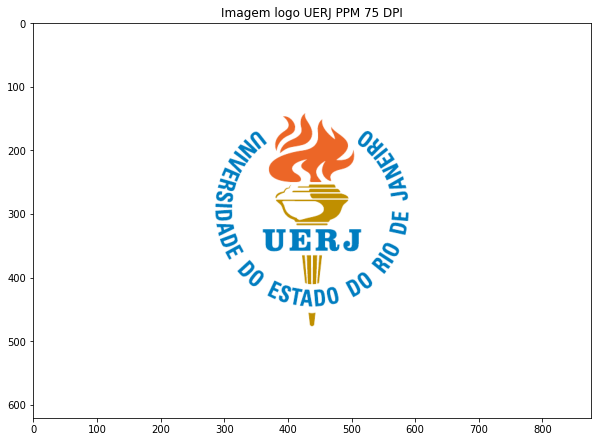

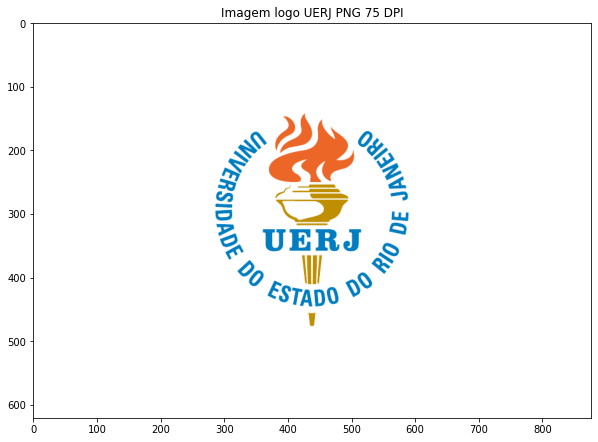

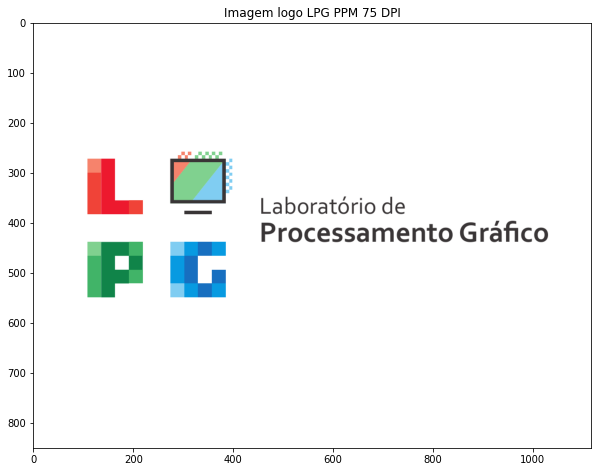

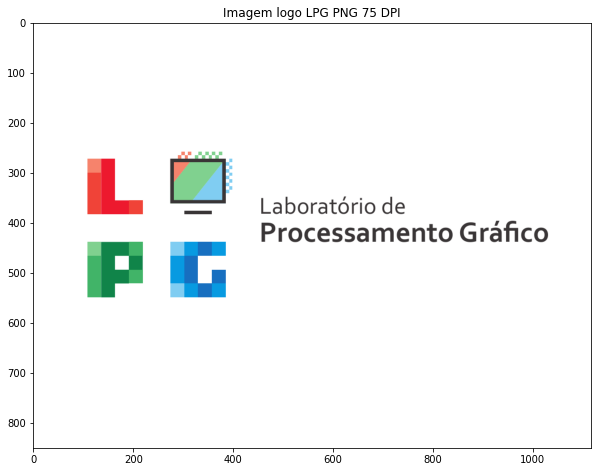

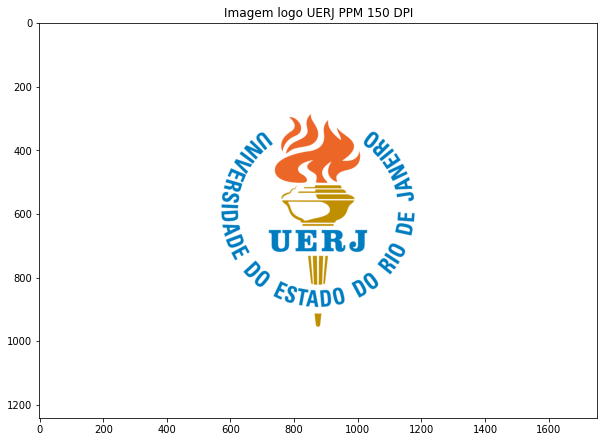

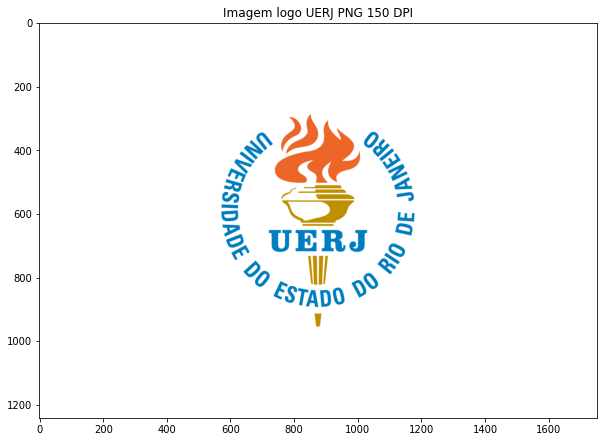

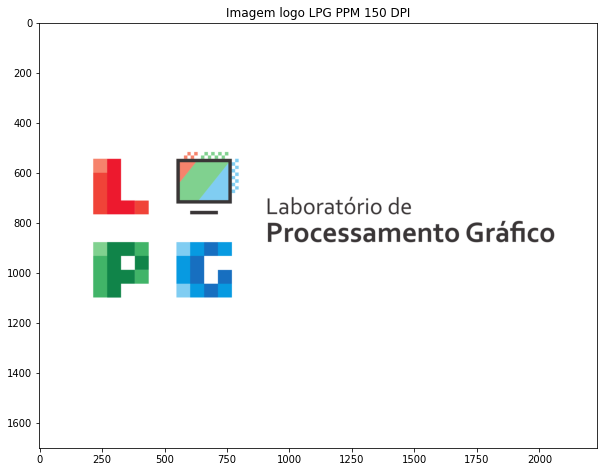

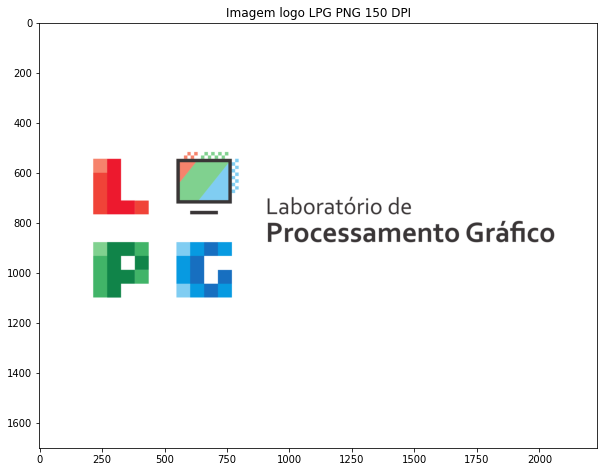

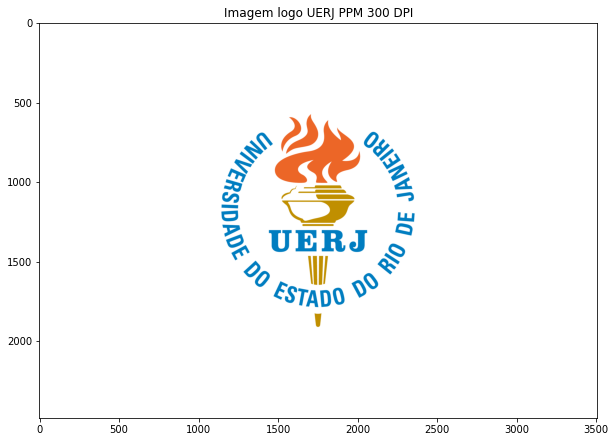

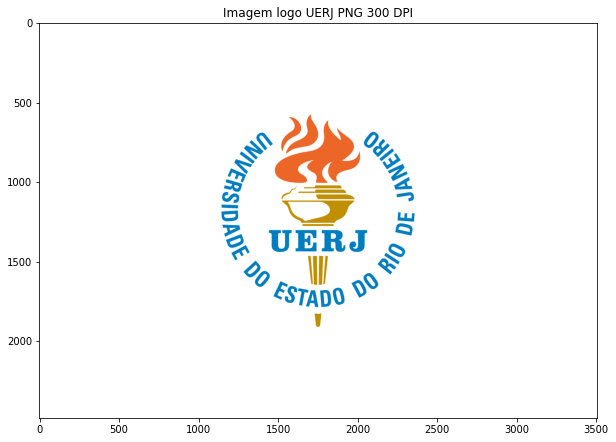

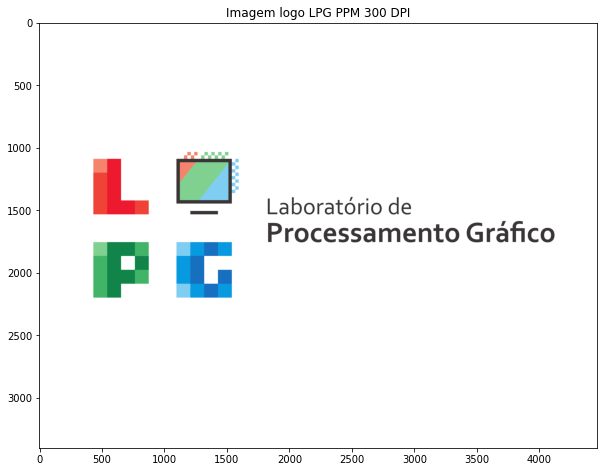

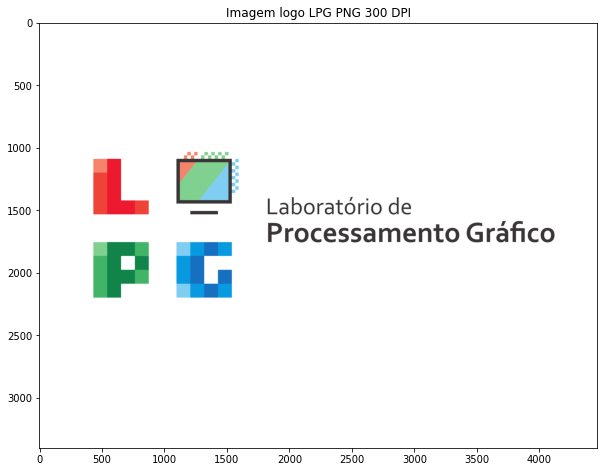

In [ ]:
import cv2
import matplotlib.pyplot as plt
#Obs: Para a exibição das imagens eu alterei de (10,10) para (150,150) por vez para poder
#avaliar perda da qualidade, porém por questão de processamento preferi deixar
#o codigo com (10,10) em todas as imagens

#EXIBINDO AS IMAGENS EM 75 DPI
img = cv2.imread('outuerj75.ppm')
plt.figure(figsize = (10,10))
plt.title('Imagem logo UERJ PPM 75 DPI')
#plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

img = cv2.imread('outuerj75.png')
plt.figure(figsize = (10,10))
plt.title('Imagem logo UERJ PNG 75 DPI')
#plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

img = cv2.imread('out75.ppm')
plt.figure(figsize = (10,10))
plt.title('Imagem logo LPG PPM 75 DPI')
#plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

img = cv2.imread('out75.png')
plt.figure(figsize = (10,10))
plt.title('Imagem logo LPG PNG 75 DPI')
#plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


#EXIBINDO AS IMAGENS EM 150 DPI
img = cv2.imread('outuerj150.ppm')
plt.figure(figsize = (10,10))
plt.title('Imagem logo UERJ PPM 150 DPI')
#plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

img = cv2.imread('outuerj150.png')
plt.figure(figsize = (10,10))
plt.title('Imagem logo UERJ PNG 150 DPI')
#plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

img = cv2.imread('out150.ppm')
plt.figure(figsize = (10,10))
plt.title('Imagem logo LPG PPM 150 DPI')
#plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

img = cv2.imread('out150.png')
plt.figure(figsize = (10,10))
plt.title('Imagem logo LPG PNG 150 DPI')
#plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


#EXIBINDO AS IMAGENS EM 300 DPI
img = cv2.imread('outuerj300.ppm')
plt.figure(figsize = (10,10))
plt.title('Imagem logo UERJ PPM 300 DPI')
#plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

img = cv2.imread('outuerj300.png')
plt.figure(figsize = (10,10))
plt.title('Imagem logo UERJ PNG 300 DPI')
#plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

img = cv2.imread('out300.ppm')
plt.figure(figsize = (10,10))
plt.title('Imagem logo LPG PPM 300 DPI')
#plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

img = cv2.imread('out300.png')
plt.figure(figsize = (10,10))
plt.title('Imagem logo LPG PNG 300 DPI')
#plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

print(img.shape)
!ls -la

# **Resultados e discussões**
Existem três fatores a serem discutidos a partir dos resulados obtidos: DPI, formatação de imagem e tipo de formatação de imagem.

*DPI(Dots per Inch)* nada mais é, do que a quantidade de pontos dentro de uma polegada. A quantidade de pontos por sua vez definem a capacidade de demonstrar uma maior ou menor quantidade de detalhes dessa imagens, isso significa que está se falando em resolução dessa imagem. Logo, quanto maior a resolução dessa imagem maior será o espaço necessário para ser armazenada na memória do computador.


Outro fator decisivo tanto no tamanho quanto na qualidade de exibição da imagem é a sua *formatação*. Imagens de formato PNG ao serem armazenadas sãocomprimidas em duas etapas por compressão LZW (sem perdas) e é considerado um formato de armazenamento de imagens capaz de reduzir de forma significativa o tamanho de sua imagem. O formato PPM usado neste item, diferentemente do formato anteriore não comprime o arquivo de sua imagem, isso significa que seu tamanho é extremamente maior do que os exemplificados anteriormente para um mesmo arquivo.

Ambos formatos são do tipo raster, o que siginifica, que a imagem é forma da por uma ou mais 'bandas' que nada mais é do que uma matriz onde cada elemento representa um pixel e seu valor o nivel de cinza desse pixel, a imagem colorida normalmente possui três bandas (RGB) enquanto a imagem em tons de cinza é monocromática, possuindo uma banda (isso também afeta o tamanho de um arquivo de imagem, porém esse fato não será explorado). Em contra partida, existe o formato vetorial que é, como o nome diz, composto por vetores. O PDF, por exmeplo, é um dos formatos mais conhecidos para arquivos de texto,contendo vários elementos, podem incluir se imbutido, uma imagem de formato raster.

Uma  mesma imagem de formatação raster terá uma qualidade diferente de sua equivalente em formato vetorial (quando a imagem é suportada por ambos formatos), esse fator normalmente é visto com claridade quando se amplifica a visualização de uma parte qualquer da imagem (em casos de imagens de grande resolução). Quanto mais se aproxima-se da figura mais se é perceptivel uma caracterítca pictoresca na imagem raster enquanto a vetorial mantém sua qualidade. Em contra partida uma imagem vetorial é comumente menor que a mesma em raster.

As informações apresentadas são comprovadas com os resultados obitidos. Nesta questão foram convertidos duas imagens em pdf para as resoluções de 75, 150 e 300 DPI, nos formatos PPM e PNG.

A primeira tabela apresenta os valores em tamanho de bytes dos arquivos originais.

ImagemPDF  |Tamanho
--------- | ------
Logo_UERJ |7419
Logo_LPG | 458351

Ao compara-los com o tamanho de suas respectivas conversões percebe-se claramente uma diferença de tamanho, onde a imagem 'Logo_uerj' é menor do que o qualquer um dos arquivos convertidos para formação raster, enquanto o arquivo 'Logo_LPG' apresenta um tamanho próximo ao seu respectivo com resolução de 150 DPI em formato PNG, apresentada na segunda tabela.


Imagem   |75DPI   |150DPI   |300DPI
--------- | ------ | ------ | ------
LPG_PPM  |2851717  |11395016|45569807
LPG_PNG  |19610    |45011   |315295
UERJ_PPM |1633866  |6530159 |26110061
UERJ_PNG |29189    |65382   |148517

Ignorando a formatação da imagem percebe-se claramente na segunda tabela que o tamanho da imagem cresce a medida que se aumenta sua resolução, por sua vez ao comparar formatos diferentes de mesma resolução coseguimos ver que as imagens PPM são bem maiores do que seus arquivos em PNG, que são comprimidos.

Ao se comparar a qualidade entre imagens é dificil de notar uma perda na qualidade da imagem PNG em comparação a PPM, o principal ponto a se entender nesse caso é que o formato PNG realiza um tipo de compressão sem perdas enquanto a PPM não comprime a imagem. Por outro lado, como ambas são imagens raster, o DPI é essencil para os detalhes. Para que uma diferença entre resoluções de imagens ser perceptível, é necessário uma maior amplificação nas imagens de 300 DPI para as imagens de 150 DPI, e por sua vez para as imagens de 75 DPI, assim traduzindo que quanto maior a resolução maior será a quantidade de detalhes que a imagens é capaz de exibir. Essa afirmação é demonstrada neste item do trabalho, pois a imagem 'Logo_uerj' utilizou de parâmetros (150,150) com 75 DPI para ser visível levemente uma menor suavisação em suas bordas, enquando com 150 ou 300 DPI essa diferença já não é mais preceptível implicando na necessidade do aumento desse parâmetro para que essa perda de qualidade possa se tornar novamente visível.